In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tf_util.systems import system_from_str
from train_dsn import train_dsn
import seaborn as sns

In [3]:
system_D = 2;
system_str = 'linear_%dD' % system_D;

behavior_str = 'oscillation';
bounds = [1.0, 2.0];

system_class = system_from_str(system_str);
system = system_class(behavior_str, bounds);
print(system.name)

linear_2D


In [4]:
# create test parameter grid

start = -100.0;
stop = 100.0;
res = 50;
vals = np.arange(start, stop, res);
num_pts = vals.shape[0];

total_pts = num_pts**4;
params = np.zeros((total_pts,4));
T_a_valid = np.zeros((total_pts, 6));
ind = 0;
for i in range(num_pts):
    a1 = vals[i];
    for j in range(num_pts):
        a2 = vals[j];
        for k in range(num_pts):
            a3 = vals[k];
            for l in range(num_pts):
                a4 = vals[l];
                params[ind,:] = np.array([a1, a2, a3, a4]);
                if ((a1 + a4)**2 >= 4*(a1*a4 + a2*a3)):
                    lambda_1_real = 0.5*((a1+a4) + np.sqrt((a1 + a4)**2 - 4*(a1*a4 + a2*a3)));
                    lambda_2_real = 0.5*((a1+a4) - np.sqrt((a1 + a4)**2 - 4*(a1*a4 + a2*a3)));
                    lambda_1_imag = 0.0;
                else:
                    if ((a1 + a4) == 0):
                        lambda_1_real = 0.0;
                        lambda_2_real = 0.0;
                        lambda_1_imag = np.sqrt(a1*a4 + a2*a3);
                    else:
                        lambda_1_real = (a1+a4)/2.0;
                        lambda_2_real = (a1+a4)/2.0;
                        lambda_1_imag = np.sqrt(4*(a1*a4 + a2*a3) - (a1 + a4)**2)/2.0;
                T_a_valid[ind,:] = np.array([lambda_1_real, np.square(lambda_1_real), \
                                             lambda_2_real, np.square(lambda_2_real), \
                                             lambda_1_imag, np.square(lambda_1_imag)]);
                if (np.count_nonzero(np.isnan(T_a_valid[ind,:])) > 0):
                    print('found nans');
                    print(a1,a2,a3,a4);
                    print(T_a_valid[ind,:])
                ind += 1;


print(np.count_nonzero(np.isnan(T_a_valid)));
print(np.count_nonzero(np.isinf(T_a_valid)));

0
0


In [5]:
num_params = system.D;
K = 1;
M = total_pts;
phi = tf.placeholder(dtype=tf.float64, shape=(K, M, num_params, 1));

T_a = system.analytic_suff_stats(phi);

_phi = np.expand_dims(np.expand_dims(params, 0), 3);

phi (1, 256, 4, 1)


In [6]:
with tf.Session() as sess:
    _T_a = sess.run(T_a, {phi:_phi});

print(np.count_nonzero(np.isnan(_T_a)), 'nans');
print(np.count_nonzero(np.isinf(_T_a)), 'infs');

error = np.sum(np.square(_T_a - T_a_valid));

print('error:', error);

0 nans
0 infs
error: 1.6028665382392403e-23


In [7]:
# behavioral constraints
mu = np.array([0.0, 0.0, 4.0]);
Sigma = np.array([.001, .001, 1.0]);

behavior = {'mu':mu, 'Sigma':Sigma};


c_init 100.0
results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/
0 <tf_util.flows.PlanarFlowLayer object at 0x122afccf8>
Tensor("Const_2:0", shape=(4, 1), dtype=float64)
Tensor("Const_3:0", shape=(1, 1), dtype=float64)
zshapes in
connect flow
(?, ?, 4, ?)
0 PlanarFlow_Layer1
(?, ?, 4, ?)
phi (?, ?, 4, ?)
(3,) (3,)
train network
training DSN for linear_2D: dt=0.001, T=1
AL iteration 1
resetting optimizer
aug lag it 0
lambda [0. 0. 0. 0. 0. 0.]
c 100.0
saving model at iter 0
Doubling memory allocation for parameter logging.
Doubling memory allocation for parameter logging.
Doubling memory allocation for parameter logging.
Doubling memory allocation for parameter logging.
******************************************
it = 1000 
H 5.01603783107981
cost 11183.522425970561


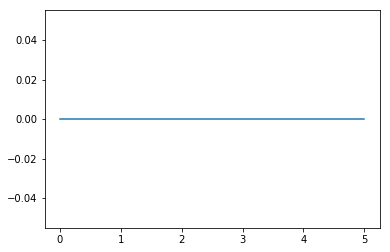

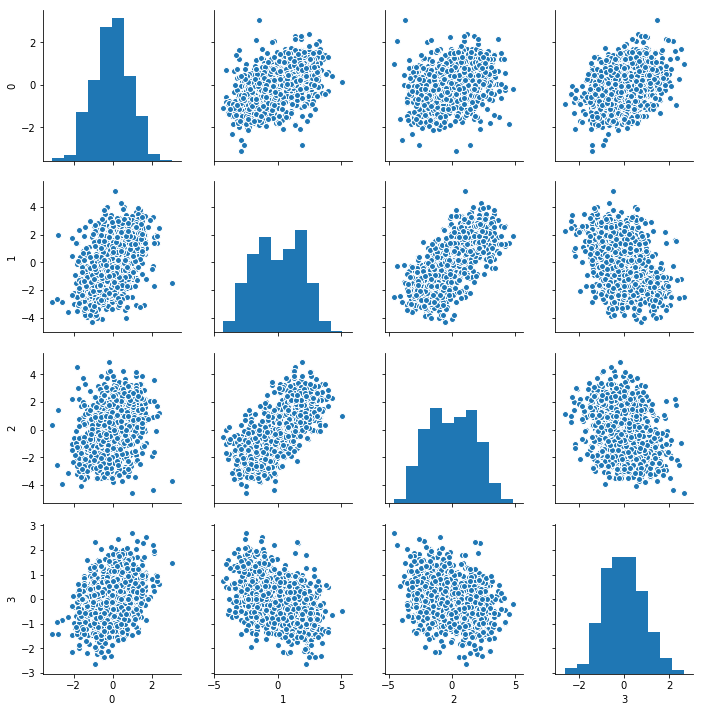

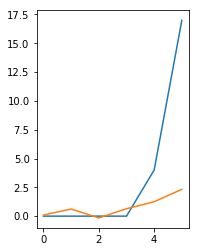

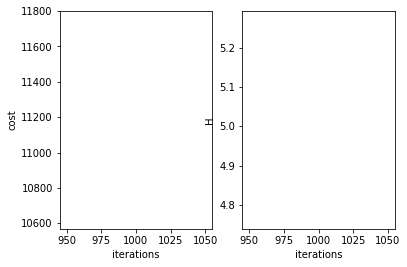

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
Doubling memory allocation for parameter logging.
******************************************
it = 2000 
H 5.17595890019473
cost 2726.7548466442668


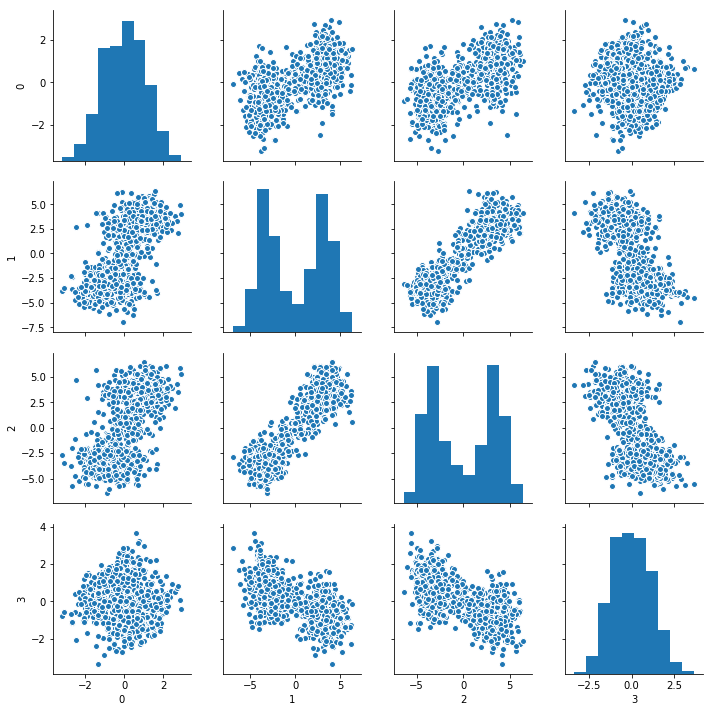

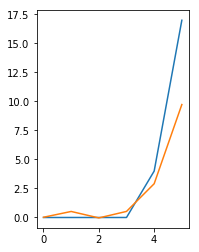

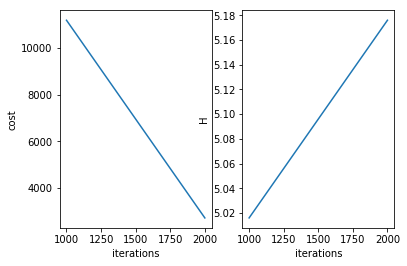

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/
AL iteration 2
resetting optimizer
aug lag it 1
lambda [   2.07741367   51.86186201   -3.62751752   52.27845273 -108.96451619
 -726.61167466]
c 1000.0
saving model at iter 0
******************************************
it = 3000 
H 5.327055088864465
cost 1285.9965723076025


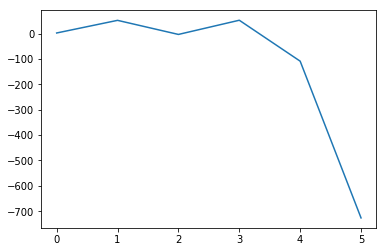

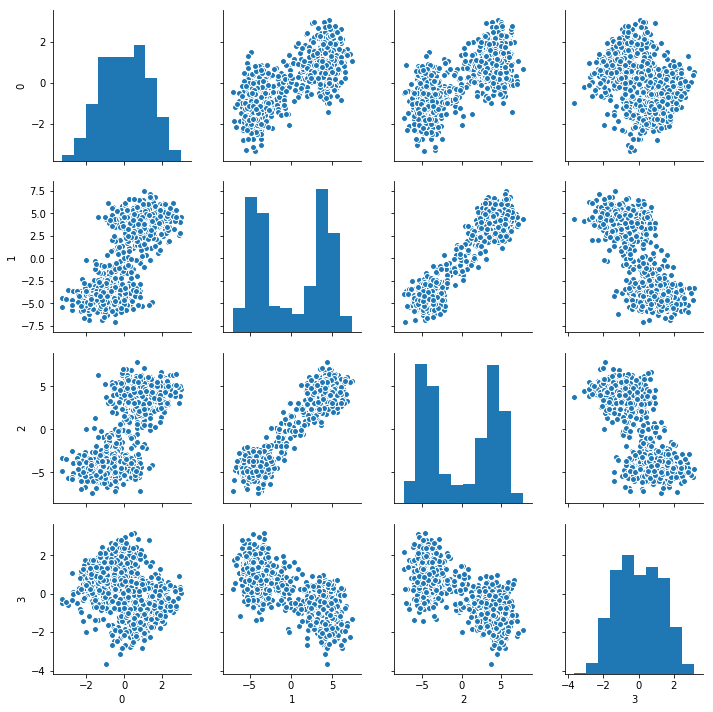

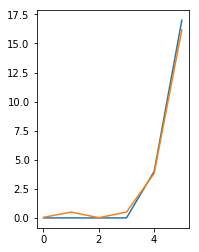

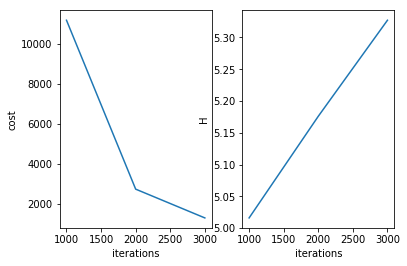

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
Doubling memory allocation for parameter logging.
******************************************
it = 4000 
H 5.201331413721108
cost 478.04057501813736


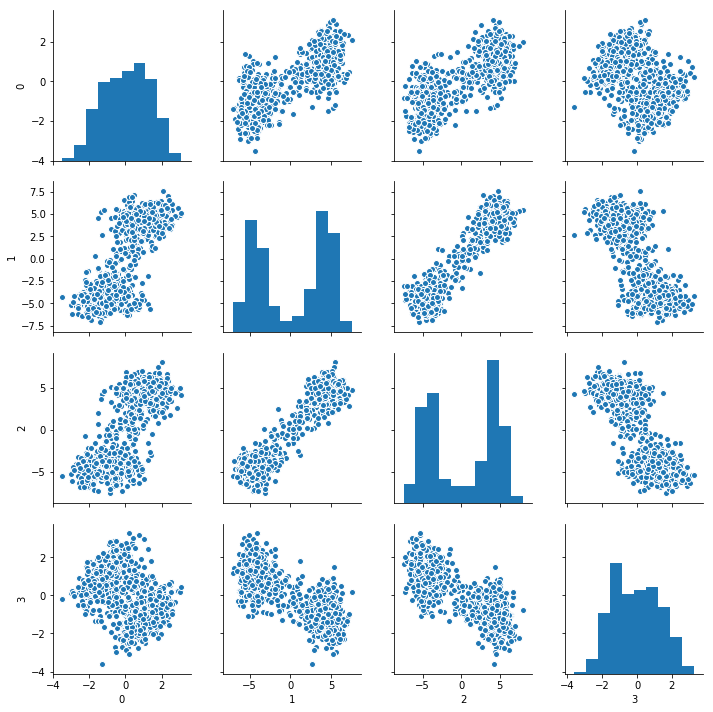

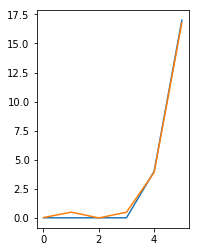

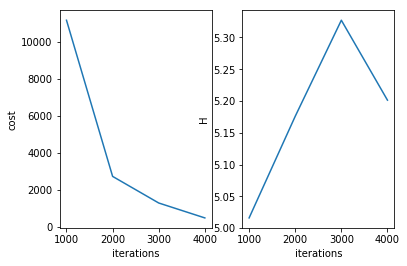

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/
AL iteration 3
resetting optimizer
aug lag it 2
lambda [  22.19672337  536.03094296  -14.46396251  531.73470123 -196.58197918
 -950.23540681]
c 10000.0
saving model at iter 0
******************************************
it = 5000 
H 5.318973187121517
cost 3871.100167239855


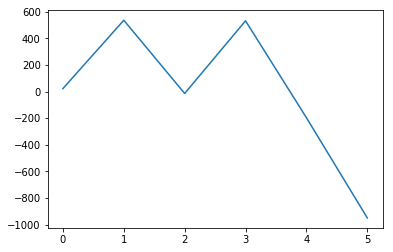

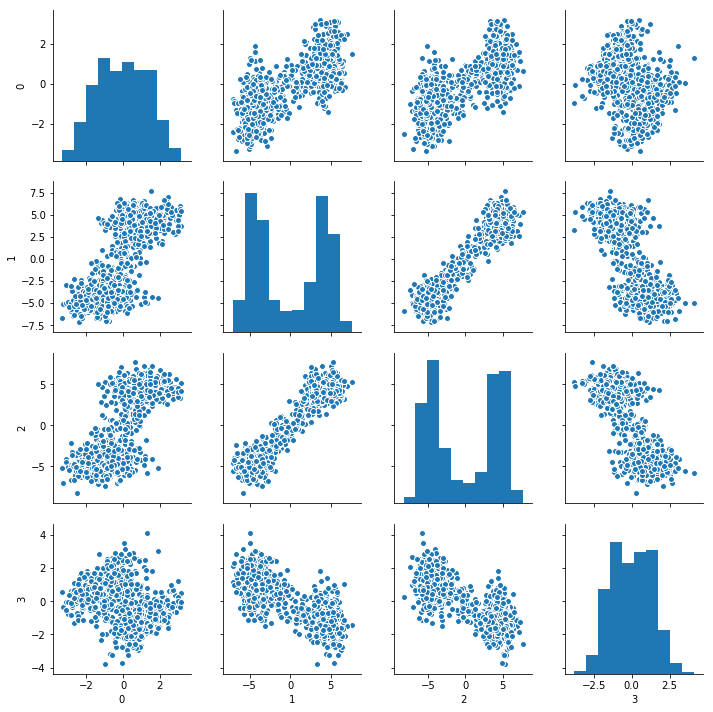

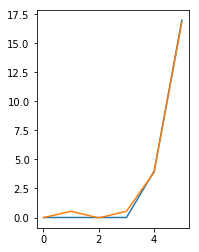

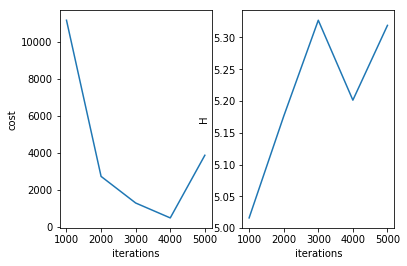

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 6000 
H 5.274702068951392
cost 3488.096520691289


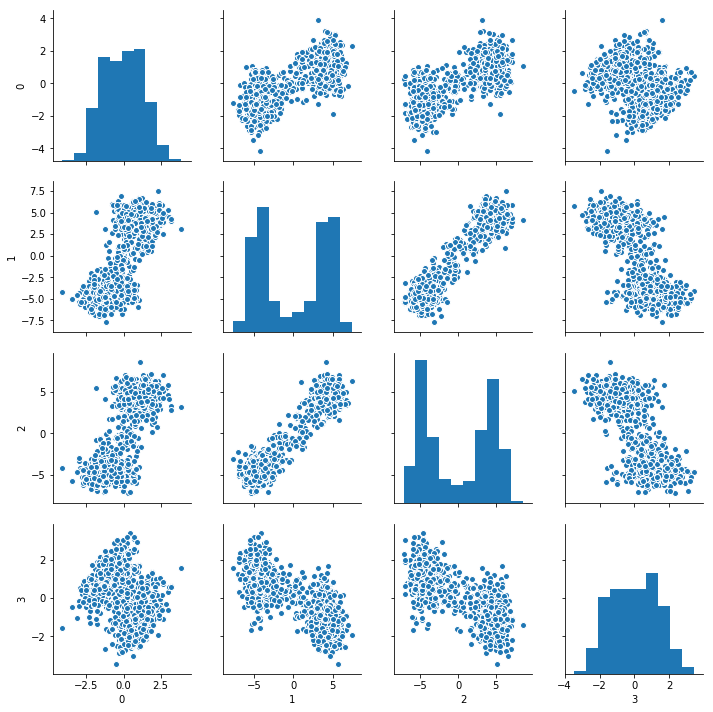

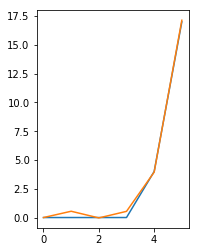

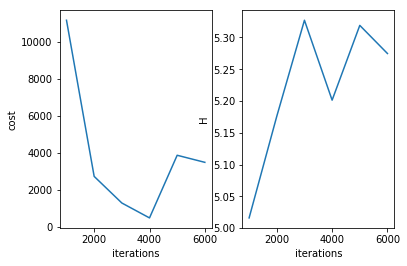

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/
AL iteration 4
resetting optimizer
aug lag it 3
lambda [  17.73909721 5986.63256981 -343.30147099 5889.51658351 -754.23489906
  429.69469596]
c 100000.0
saving model at iter 0
******************************************
it = 7000 
H 5.2928560229514465
cost 39674.56471242102


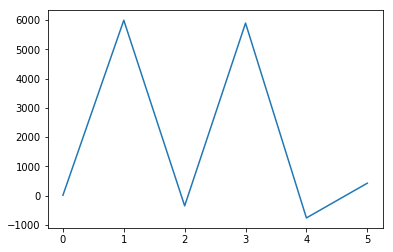

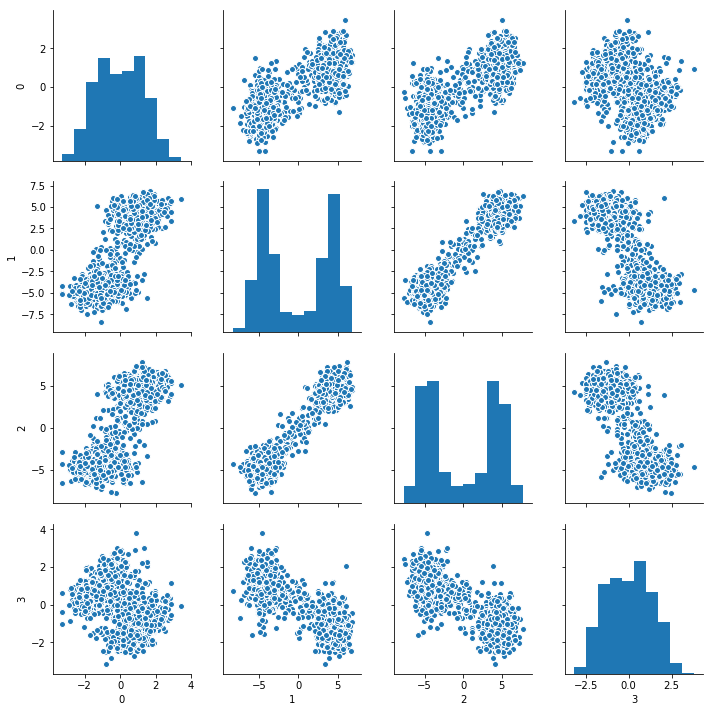

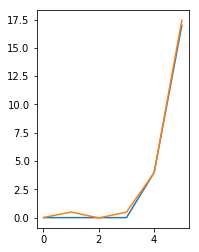

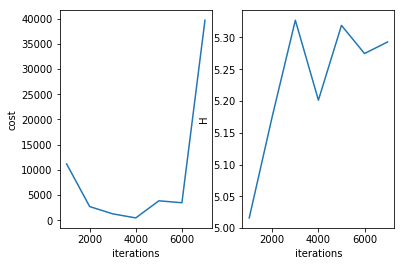

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
Doubling memory allocation for parameter logging.
******************************************
it = 8000 
H 5.269676211009308
cost 37661.46451178549


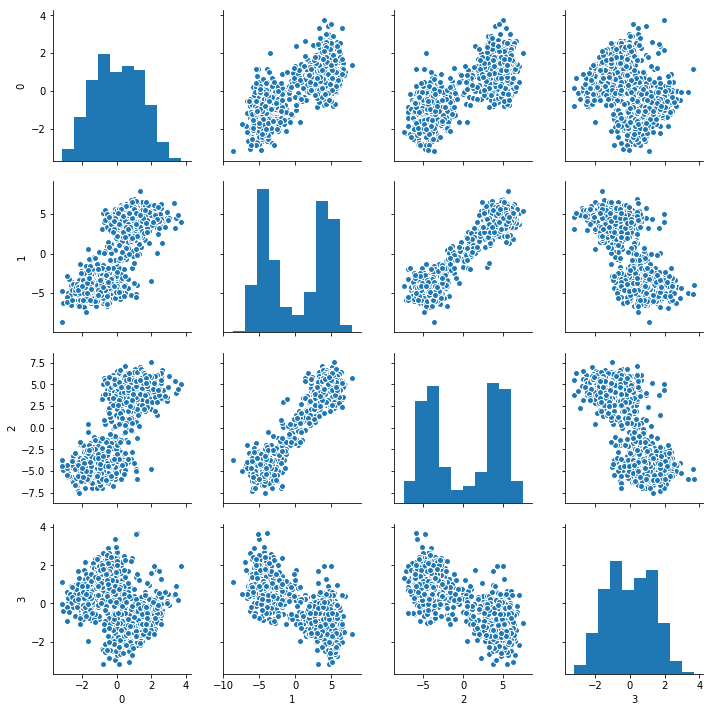

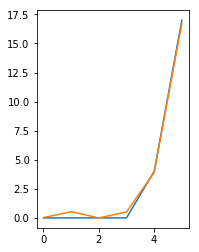

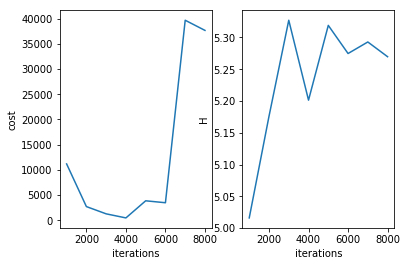

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/
AL iteration 5
resetting optimizer
aug lag it 4
lambda [  3039.12045888  59298.30755189   -387.43886935  57732.08719867
  -9770.38719818 -25808.1234667 ]
c 1000000.0
saving model at iter 0
******************************************
it = 9000 
H 5.295953971603991
cost 361335.1562335556


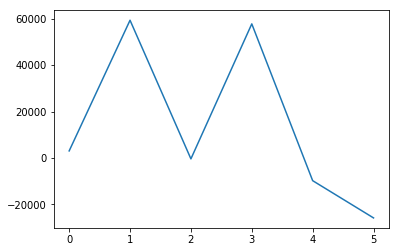

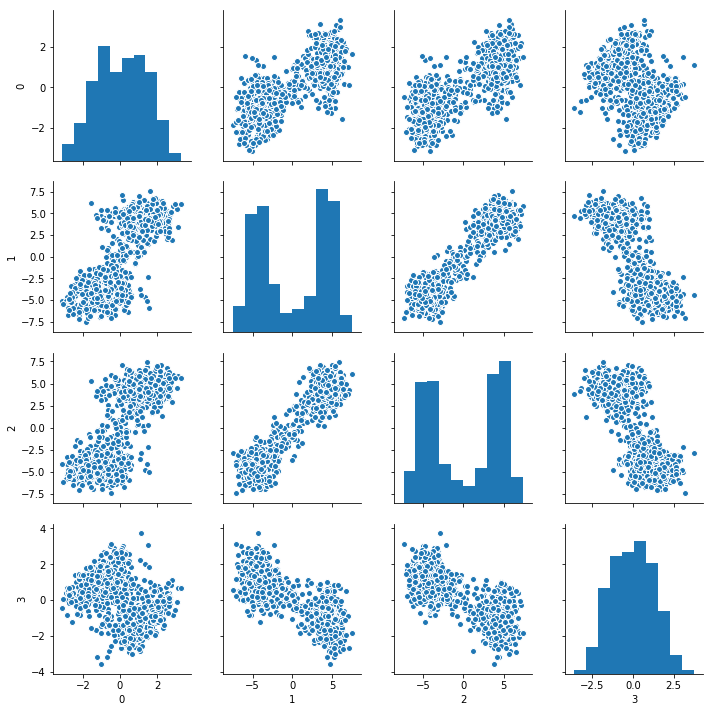

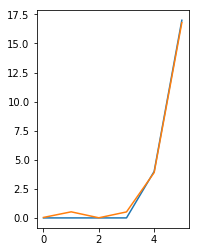

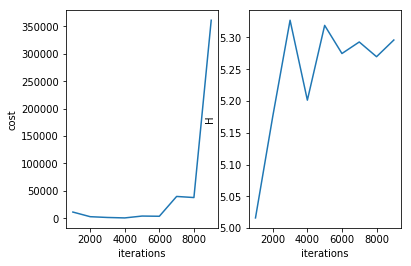

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************


In [ ]:
random_seed = 0;

TIF_flow_type = 'PlanarFlowLayer';
nlayers = 1;
flow_dict = {'latent_dynamics':None, \
             'TIF_flow_type':TIF_flow_type, \
             'repeats':nlayers};

n = 1000;
k_max = 10;
c_init = 1e2;
lr_order = -3;
check_rate = 1000;
max_iters = 2000;

np.random.seed(0);

cost, phi, T_x = train_dsn(system, behavior, n, flow_dict, \
                       k_max=k_max, c_init=c_init, lr_order=lr_order, check_rate=check_rate, \
                       max_iters=max_iters, random_seed=random_seed);



In [13]:
x_real = tf.placeholder(dtype=tf.float32, shape=());
x = tf.complex(x_real, 0.0);
print(x);
y = tf.sqrt(x) + tf.complex(x_real, 0.0);
y_real = tf.real(y);

grad = tf.gradients(y_real, x_real);

sess = tf.Session();
_grad = sess.run(grad, {x_real:-2});
print(_grad);


Tensor("Complex_2:0", shape=(), dtype=complex64)
[1.0]
